In [2]:
# import the necessary packages
from transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
from matplotlib import pyplot as plt

In [37]:
# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
#image = cv2.imread("images/sandro.jpg")
image = cv2.imread("images/mike.jpeg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

In [44]:
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
#  Use Canny algorithm to detect edge
edged = cv2.Canny(gray, 75, 200)

In [49]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

In [50]:
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.05 * peri, True)
	print(peri)
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break


320.1421353816986


STEP 2: Find contours of paper


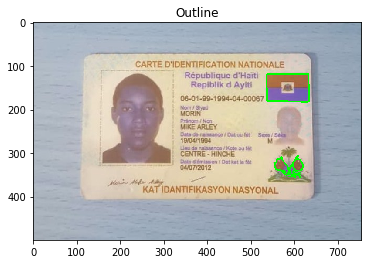

In [51]:
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)
plt.title("Outline")
plt.show()

In [35]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255


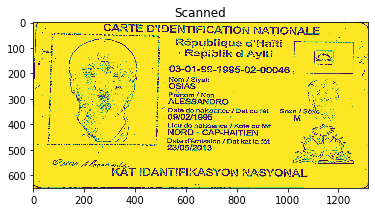

In [36]:
scan = imutils.resize(warped, height = 650)
plt.imshow(scan)
plt.title("Scanned")
plt.show()


In [36]:
crop_img = scan[50:390, 42:488]

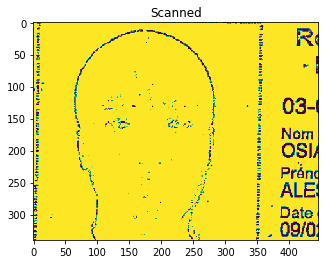

In [37]:
plt.imshow(crop_img)
plt.title("Scanned")
plt.show()